In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
style.use('ggplot') or plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# **Regression Lineal Simple**

In [159]:
url='/content/drive/MyDrive/Proyectos Machine Learning/Salary_dataset.csv'

In [160]:
df=pd.read_csv(url,sep=',')

In [161]:
df=pd.DataFrame(df)

In [162]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [163]:
#30 rows, 3 columns
df.shape

(30, 3)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [165]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [166]:
print('Suma de valores nulos es ',df.isnull().sum().sum())

Suma de valores nulos es  0


## Representacion Grafica 

In [167]:
df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

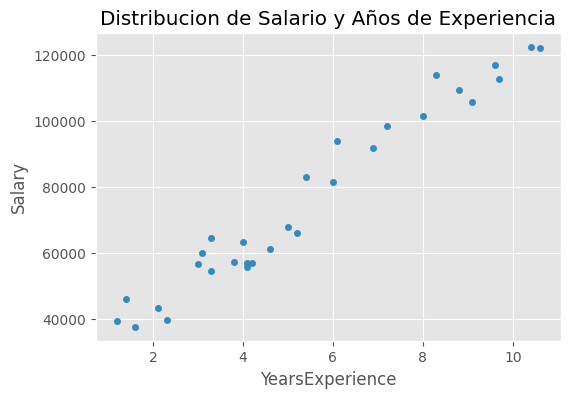

In [168]:
fig,ax=plt.subplots(figsize=(6,4))
df.plot(
    x='YearsExperience',
    y='Salary',
    kind="scatter",
    ax=ax
)
ax.set_title('Distribucion de Salario y Años de Experiencia')
plt.show()

In [169]:
#Correlacion entre los dos valores lineales
corr_test=pearsonr(x=df['YearsExperience'],y=df['Salary'])
print('--------------------------')
print("Coeficiente de correlacion de Pearson:",corr_test[0])
print('--------------------------')
print("P-Value",corr_test[1])

--------------------------
Coeficiente de correlacion de Pearson: 0.9782416184887598
--------------------------
P-Value 1.1430681092271567e-20


* el coeficiente de correlacion de pearson es de 0.98 lo que nos quiere decir que existe una correlacion directa fuerte entre los años de experiencia y salario

* el p value es menor a 0.05 lo que nos indica que el resultado es clinicamente importante

## Ajusta del  Modelo (scikit learn)

In [170]:
X=df[['YearsExperience']]
y=df[['Salary']]
X_train,X_test,y_train,y_test=train_test_split(
    X.values.reshape(-1,1),
    y.values.reshape(-1,1),
    train_size=0.8,
    random_state=125,
    shuffle=True
)
#creacion del modelo 
modelo=LinearRegression()
modelo.fit(X=X_train.reshape(-1,1),y=y_train)

LinearRegression()

In [171]:
#informacion del modelo
print("Intercept: ",modelo.intercept_)
print("Coeficiente: ",list(zip(X.columns,modelo.coef_.flatten(),)))
print("Coeficiente de determinacion R^2:", modelo.score(X,y))

Intercept:  [21560.32111163]
Coeficiente:  [('YearsExperience', 10012.406533850928)]
Coeficiente de determinacion R^2: 0.9534853293471314


In [172]:
#Erro del test del modelo
predicciones=modelo.predict(X=X_test)
print('Predicciones')
print(predicciones[0:3,])
rmse=mean_squared_error(
    y_true=y_test,
    y_pred=predicciones,
    squared=False
)
print("")
print(f" El error RMSE de test es : {rmse}")

Predicciones
[[112673.22056967]
 [ 73624.83508765]
 [ 54601.26267334]]

 El error RMSE de test es : 8280.565035069669


### Checking Accuracy_score

In [173]:
##Checking Accuracy_score
from sklearn.metrics import r2_score
ab=r2_score(y_test,predicciones)*100
ab.round(4)

88.5369

## Segunda Forma con Stasmodels

In [174]:
X=df[['YearsExperience']]
y=df[['Salary']]
X_train,X_test,y_train,y_test=train_test_split(
    X.values.reshape(-1,1),
    y.values.reshape(-1,1),
    train_size=0.8,
    random_state=125,
    shuffle=True
)

In [175]:
df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [176]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     642.9
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           8.89e-18
Time:                        15:21:46   Log-Likelihood:                -238.51
No. Observations:                  24   AIC:                             481.0
Df Residuals:                      22   BIC:                             483.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.156e+04   2399.626      8.985      0.0

In [177]:
#intervalos de confianza del modelo en si
modelo.conf_int(alpha=0.05)

array([[16583.80236562, 26536.83985764],
       [ 9193.4784012 , 10831.3346665 ]])

In [178]:
#Prediciones con los intervalos del 95%
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,44588.856139,1637.040583,41193.841763,47983.870516,33218.281573,55959.430706
1,61609.947247,1210.352889,59099.828988,64120.065506,50471.521100,72748.373394
2,117679.423837,1958.865960,113616.984478,121741.863195,106092.048944,129266.798729
3,90645.926195,1213.462274,88129.359466,93162.492924,79506.045071,101785.807319


### Representación gráfica del modelo

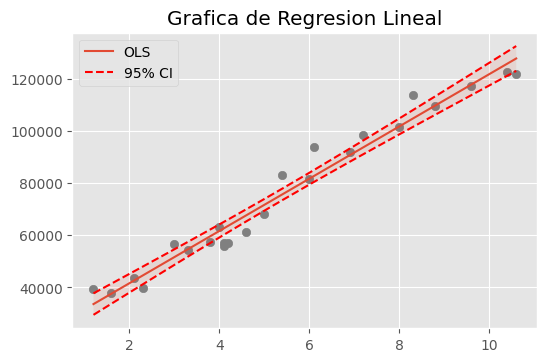

In [179]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend()
plt.title('Grafica de Regresion Lineal')
plt.show()

In [180]:
# Error de test del modelo 
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
print("Predicciones :",predicciones)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

Predicciones : [112673.22056967  73624.83508765  54601.26267334  35577.69025902
 118680.66448998  52598.78136657]

El error (rmse) de test es: 8280.565035069674


### Checking Accuracy_score

In [181]:
##Checking Accuracy_score
from sklearn.metrics import r2_score
ab=r2_score(y_test,predicciones)*100
ab.round(4)

88.5369

# Multiple linear regression

In [182]:
url='/content/drive/MyDrive/Proyectos Machine Learning/kc_house_data.csv'

In [183]:
df2=pd.read_csv(url,sep=',')

In [184]:
df2=pd.DataFrame(df2)

In [185]:
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [186]:
#21613 filas y 21 columnas
df2.shape

(21613, 21)

In [187]:
#los tipos son en categoricas con object, numerica int, float
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [188]:
df2.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [189]:
df2.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [190]:
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [191]:
#eliminar las columnas innecesarias dentro del data set
df2=df2.drop(['id','date'],axis=1)

## Relacion entre Variables

In [192]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = df2.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
67,sqft_living,sqft_above,0.876597,0.876597
193,sqft_above,sqft_living,0.876597,0.876597
66,sqft_living,grade,0.762704,0.762704
174,grade,sqft_living,0.762704,0.762704
326,sqft_living15,sqft_living,0.756420,0.756420
74,sqft_living,sqft_living15,0.756420,0.756420
199,sqft_above,grade,0.755923,0.755923
181,grade,sqft_above,0.755923,0.755923
41,bathrooms,sqft_living,0.754665,0.754665
59,sqft_living,bathrooms,0.754665,0.754665


**Gráfico de distribución para cada variable numérica**

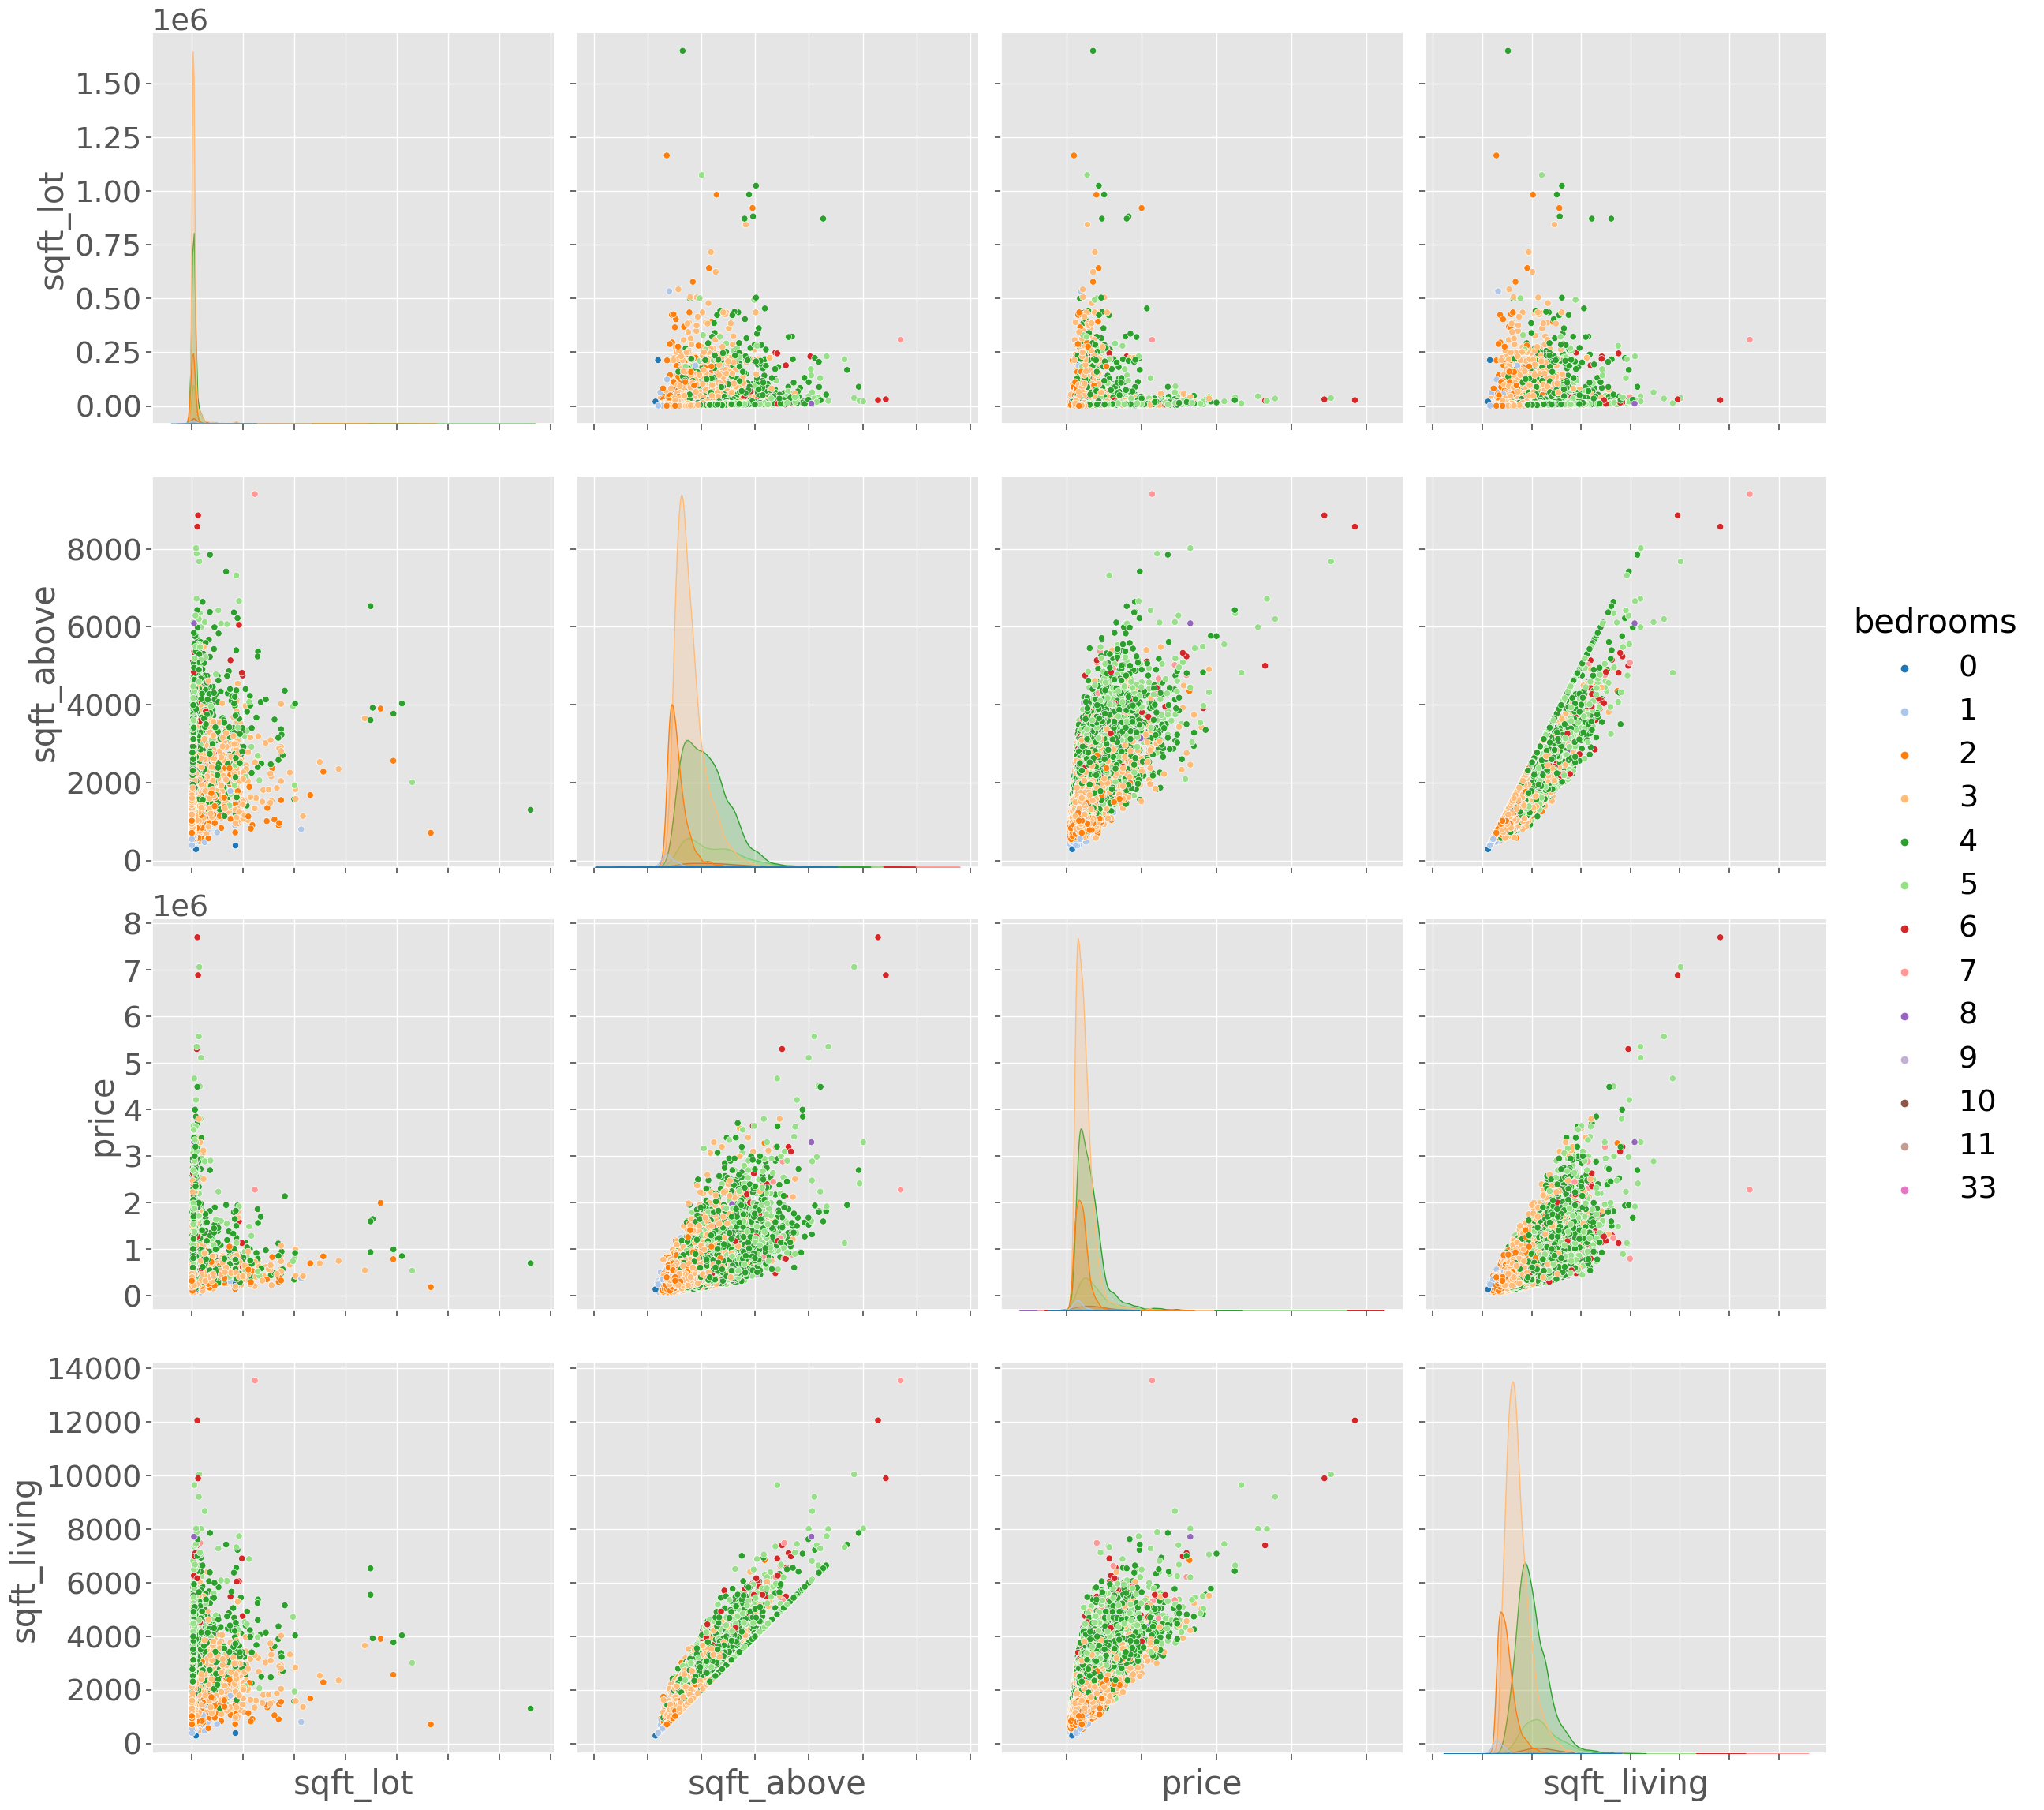

In [193]:
#understanding the distribution with seaborn
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(df2[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[]);

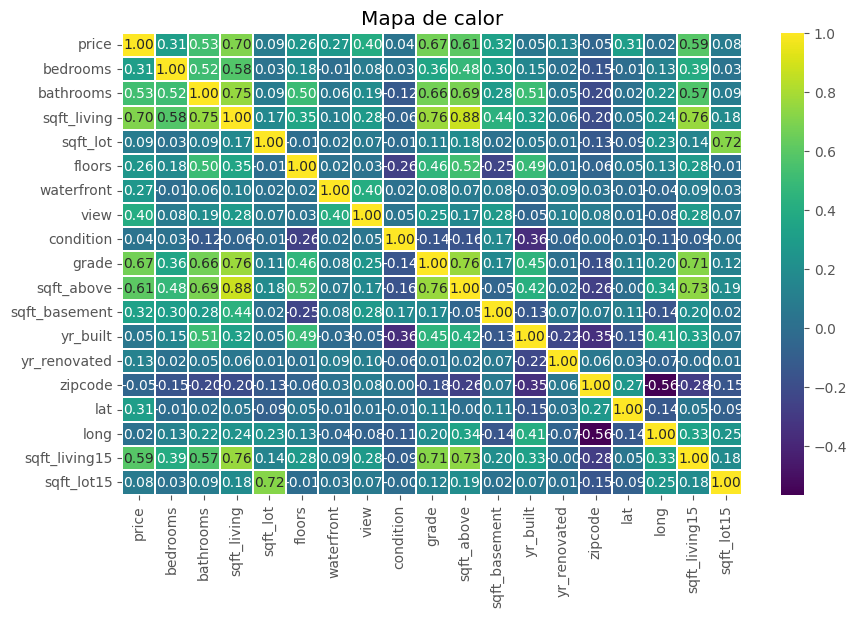

In [194]:
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(),
            annot=True,
            cmap='viridis',
            fmt='.2f',
            linewidths=.2
            )
plt.title('Mapa de calor')
plt.show()

## **Ajuste del Modelo**

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats
#estilos de matplotlib
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [240]:
X = df2.iloc[:,1:]
y = df2.iloc[:,0]

In [241]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [242]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train=sm.add_constant(X_train,prepend=True)
modelo=sm.OLS(endog=y_train,exog=X_train)
modelo=modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     2347.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:33:27   Log-Likelihood:            -2.3578e+05
No. Observations:               17290   AIC:                         4.716e+05
Df Residuals:                   17272   BIC:                         4.717e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.416e+06   3.29e+06      2.254

In [243]:
X_train = X_train.drop(columns ='floors')
X_test  = X_test.drop(columns = 'floors')

In [244]:
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     2493.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:33:31   Log-Likelihood:            -2.3578e+05
No. Observations:               17290   AIC:                         4.716e+05
Df Residuals:                   17273   BIC:                         4.717e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.282e+06   3.24e+06      1.937

In [245]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-76483.521296,1.264123e+07
bedrooms,-40084.662843,-3.183614e+04
bathrooms,38640.876924,5.255384e+04
sqft_living,105.269509,1.152512e+02
sqft_lot,-0.023729,1.848201e-01
waterfront,516397.071863,5.929380e+05
view,48510.894161,5.801807e+04
condition,22509.881303,3.279530e+04
grade,91312.783043,1.007653e+05
sqft_above,69.145471,7.836407e+01


In [246]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

### **Inspección visual**

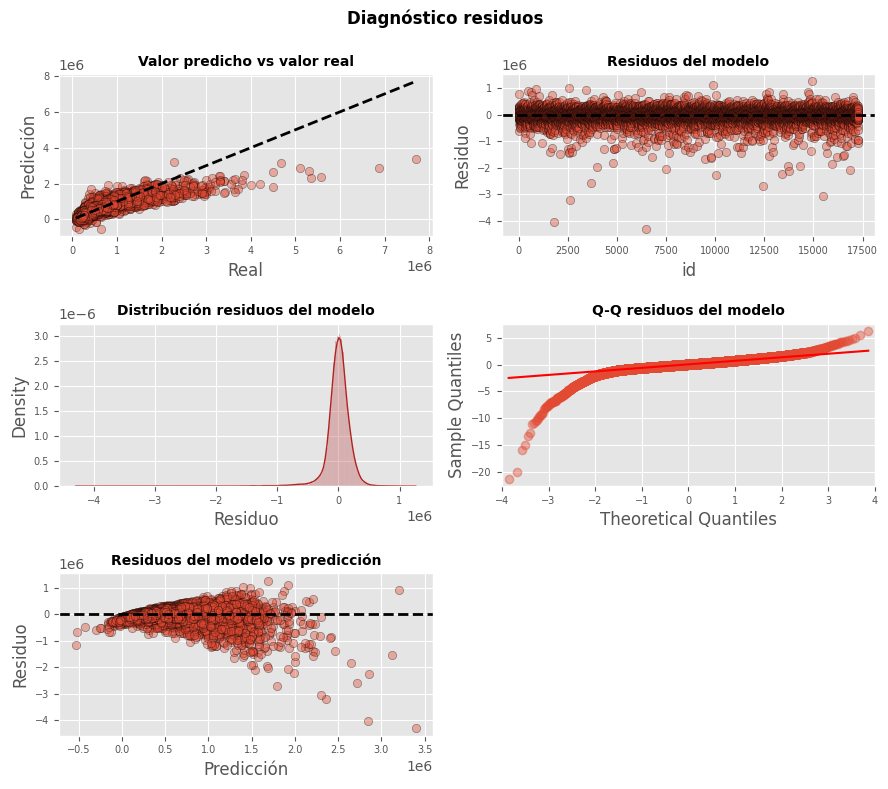

In [249]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

### **Test de Normalidad**

In [247]:
#Normalidad de los residuos Shapiro wilk test
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.7967664003372192, pvalue=0.0)

In [248]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 14667.5459491098, p-value = 0.0


Ambos test muestran claras evidencias para rechazar la hipótesis de que los datos se distribuyen de forma normal

### **Predicciones**

In [214]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
20231,423275.576375,4097.193652,415244.661632,431306.491117,26231.946331,8.203192e+05
10934,552255.191204,3835.104591,544737.997580,559772.384828,155221.619869,9.492888e+05
9063,754748.973915,7999.987074,739068.188580,770429.759250,357476.981955,1.152021e+06
9702,413304.672949,4954.914731,403592.537976,423016.807922,16223.479573,8.103859e+05


### **Error de Test**

In [215]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 196369.79830256922


## **Otra forma de Analizar** 

In [234]:
#separamos las variables dependientes e independientes 
X = df2.iloc[:,1:].values
y = df2.iloc[:,0].values

### **train_test_split**

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 125)

In [236]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [237]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [238]:
import statsmodels.api as sm  # importa el módulo statsmodels.api en lugar de statsmodels.formula.api

def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((21613,19)).astype(int)
    for i in range(0, numVars):
        # crea una instancia de la clase OLS
        model = sm.OLS(endog=y, exog=x)
        regressor_OLS = model.fit()
        
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    # crea otra instancia de la clase OLS
                    tmp_regressor = sm.OLS(endog=y, exog=x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x

SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17]]
X_Modeled = backwardElimination(X_opt, SL)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                          1.211e+04
Date:                Wed, 19 Apr 2023   Prob (F-statistic):                        0.00
Time:                        16:08:54   Log-Likelihood:                     -2.9461e+05
No. Observations:               21613   AIC:                                  5.892e+05
Df Residuals:                   21596   BIC:                                  5.894e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------